In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 4 May 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# print(tmp_files_dir + expt + '_Tf_heat_transp_1500m_daily')

In [5]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily')
Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_5daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
Tf_heat_transport_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
heat_transport_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
temp_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
z_rho_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CalvingFront')
dist_along_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CalvingFront')
lon_along_10kmCF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CalvingFront')
lat_along_10kmCF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CalvingFront')
distance_indices_10kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [7]:
expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_1500m_daily')
Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_1500m_daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m_daily')
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [8]:
expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
Tf_heat_transport_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
heat_transport_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
temp_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
z_rho_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_CalvingFront')
dist_along_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_CalvingFront')
lon_along_4kmCF = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_CalvingFront')
lat_along_4kmCF = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_CalvingFront')
distance_indices_4kmCF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [9]:
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_1500m_daily')
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_1500m_daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m_daily')
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m_daily')
z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

In [10]:
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_transp_CalvingFront')
Tf_heat_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_transp_CalvingFront')
heat_transport_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_CalvingFront')
temp_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_CalvingFront')
z_rho_4kmNT_CF = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [9]:
print(heat_transport_10km.shape)

(73, 31, 2588)


# Daily/5-daily files:

When during daily, I saved separated the heat_transp and Tf_heat_transp variables. 
For annual mean files, the heat_transp is already the abosulte heat_transp minus Tf_heat_transp
In daily files, the heat transport is simply the absolute heat_transp, so need to subtract Tf_heat_transp from it,
to obtain the heat transport referenced to the minimum temperature at the shelf break (e.g., -1.95degC at WAOM10)


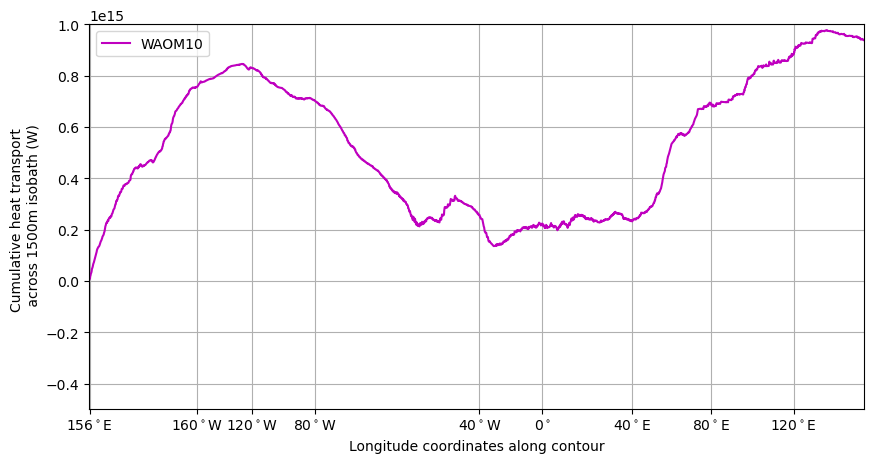

In [17]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
# along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

# some plots:
fig, ax = plt.subplots(nrows=1, figsize = (10, 5))
# plotting absolute value: Tf heat transport already subtracted during the calculation
# plt.plot(along_10km,(np.sum(np.cumsum(heat_transport_10km, axis=1),axis=0)), '-r', label='WAOM10')
plt.plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10') #'-k', label='Heat transport anomaly from $T_f$')
# plt.plot(dist_along_4km,(np.sum(np.cumsum(heat_transport_4km, axis=1),axis=0)), '-b', label='WAOM4')
# plt.plot(dist_along_4km,(np.sum(np.cumsum(heat_transport_4kmNT, axis=1),axis=0)), '-c', label='WAOM4-NOTIDE')

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])
ax.set_ylim(-0.5e15, 1.e15)

ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
plt.grid()
plt.legend()
name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_raw_daily.png'
plt.savefig(fig_path + name_fig, dpi=300)


In [30]:
# seasonal plots:
months=np.arange(0,73)*(5/30.41667)

sum=np.where((months>=0)&(months<=3))
aut=np.where((months>=4)&(months<=6))
win=np.where((months>=7)&(months<=9))
spr=np.where((months>=10)&(months<=12))
print(sum,aut,win,spr)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),) (array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),) (array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),) (array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]),)


In [38]:
sum[

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [29]:
# plot w/ 4 seasons:

fig, ax = plt.subplots(nrows=4, figsize = (10, 5))
# Summer
ax[0].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km[sum,]-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10 JFM') 
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-0.5e15, 1.e15)
# ax[0].set_xlabel('Longitude coordinates along contour')
ax[0].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
# Autumn
ax[1].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10 JFM') 
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].set_ylim(-0.5e15, 1.e15)
# ax[1].set_xlabel('Longitude coordinates along contour')
ax[1].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
# Winter
ax[2].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10 JFM') 
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].set_ylim(-0.5e15, 1.e15)
# ax[2].set_xlabel('Longitude coordinates along contour')
ax[2].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
# Spring
ax[3].plot(dist_along_10km,(np.sum(np.cumsum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=1),axis=0)), '-m', label='WAOM10 JFM') 
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].set_ylim(-0.5e15, 1.e15)
ax[3].set_xlabel('Longitude coordinates along contour')
ax[3].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');



plt.grid()
plt.legend()
name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_vint_raw_daily.png'
plt.savefig(fig_path + name_fig, dpi=300)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),) (array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),) (array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),) (array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]),)


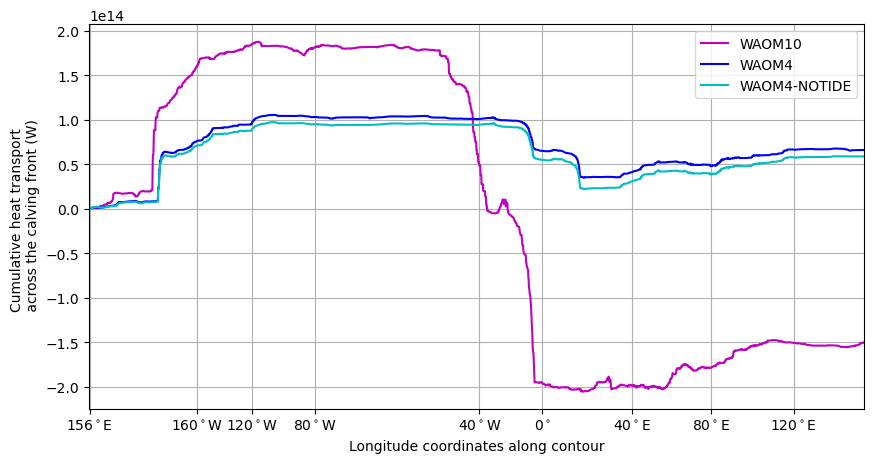

In [87]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

# some plots:
fig, ax = plt.subplots(nrows=1, figsize = (10, 5))
# plotting absolute value: Tf heat transport already subtracted during the calculation
# plt.plot(along_10km,(np.sum(np.cumsum(heat_transport_10km, axis=1),axis=0)), '-r', label='WAOM10')
plt.plot(dist_along_10kmCF, (np.sum(np.cumsum(heat_transport_10kmCF, axis=1),axis=0)), '-m', label='WAOM10') #'-k', label='Heat transport anomaly from $T_f$')
plt.plot(dist_along_4kmCF,(np.sum(np.cumsum(heat_transport_4kmCF, axis=1),axis=0)), '-b', label='WAOM4')
plt.plot(dist_along_4kmCF,(np.sum(np.cumsum(heat_transport_4kmNT_CF, axis=1),axis=0)), '-c', label='WAOM4-NOTIDE')

ax.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_10km[-1])

ax.set_xlabel('Longitude coordinates along contour')
ax.set_ylabel('Cumulative heat transport \n across the calving front (W)');
plt.grid()
plt.legend()
name_fig='WAOM10x4x4NT_Cross-CalvingFront_cumtransport_vint_raw_daily.png'
plt.savefig(fig_path + name_fig, dpi=300)


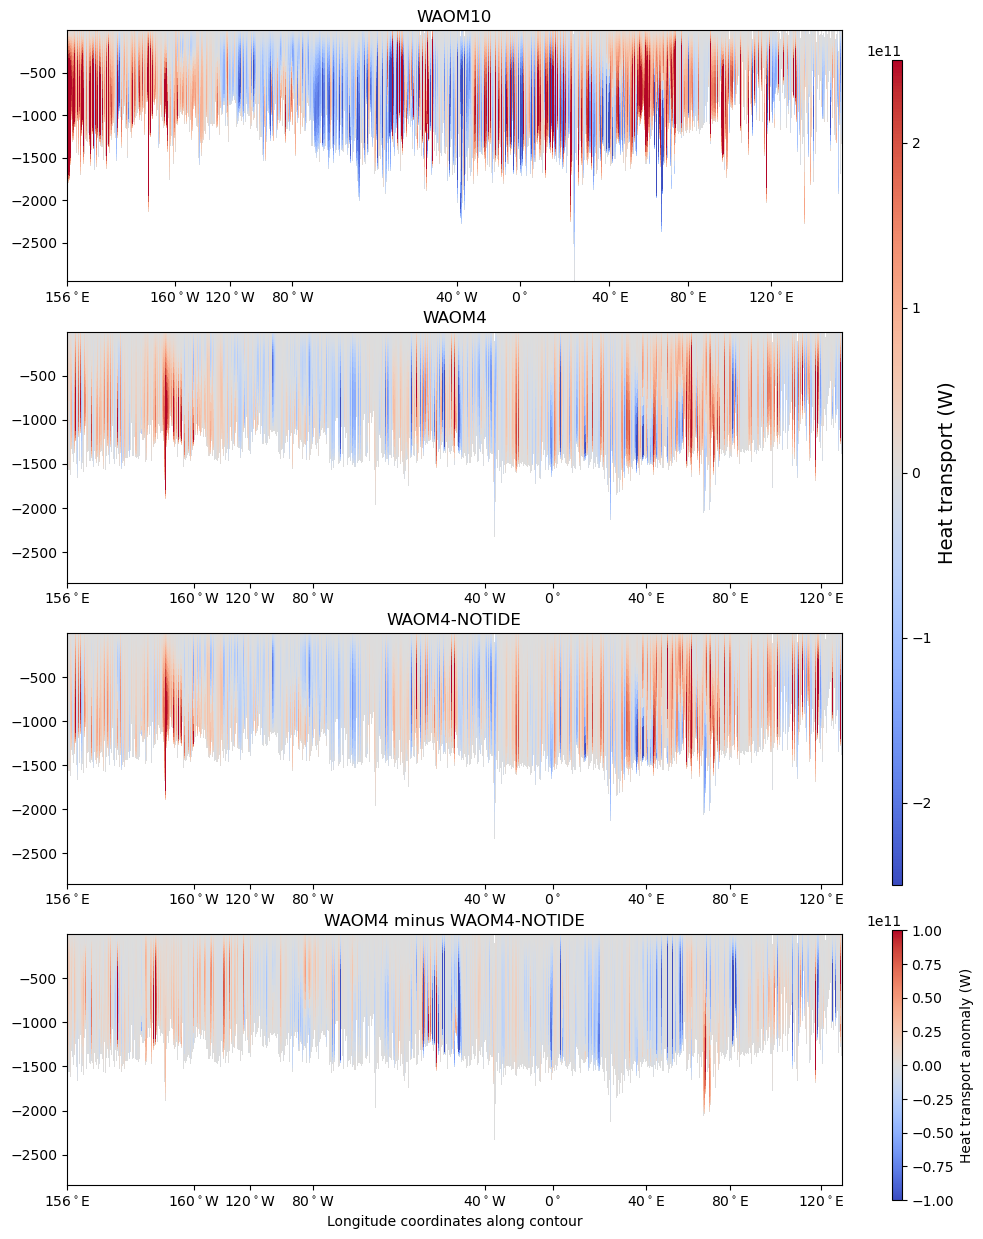

In [88]:

# define along_contour axis with same length for both resolution:
# along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4kmNT] = np.meshgrid(dist_along_4km, np.arange(0,31))

# define min/max for pcolor:
minHT = -.25e12
maxHT = .25e12

fig, ax = plt.subplots(nrows=4, figsize = (10, 15))
# plotting absolute value: Tf heat transport already subtracted during the calculation
ht = ax[0].pcolormesh(dist_along_axis_10km, z_rho_10km, heat_transport_10km, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[0].set_title('WAOM10')
ht = ax[1].pcolormesh(dist_along_axis_4km, z_rho_4km, heat_transport_4km, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[1].set_title('WAOM4')
ht = ax[2].pcolormesh(dist_along_axis_4km, z_rho_4kmNT, heat_transport_4kmNT, cmap='coolwarm', vmin=minHT, vmax=maxHT)
ax[2].set_title('WAOM4-NOTIDE')
hta = ax[3].pcolormesh(dist_along_axis_4km, z_rho_4kmNT, heat_transport_4km-heat_transport_4kmNT, cmap='coolwarm', vmin=-.1e12, vmax=.1e12)
ax[3].set_title('WAOM4 minus WAOM4-NOTIDE')

# - setting all axis xticks the same with ax.flat:
# for aa in ax.flat:
#     aa.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     aa.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     aa.set_xlim(0, dist_along_10km[-1])
# - setting individual axis xticks:
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

for aa in np.arange(1,4):
    ax[aa].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                              '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[aa].set_xlim(0, dist_along_10km[-1])

ax[3].set_xlabel('Longitude coordinates along contour')

cax1 = plt.axes([0.95, 0.31, 0.01, 0.55])
cb = plt.colorbar(ht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

cax2 = plt.axes([0.95, 0.1, 0.01, 0.18])
cb = plt.colorbar(hta, cax=cax2, orientation='vertical')
cb.ax.set_ylabel('Heat transport anomaly (W)')

name_fig='WAOM10x4x4NT_Cross-1500m_transportXdepth_daily.png'
plt.savefig(fig_path + name_fig, dpi=300)


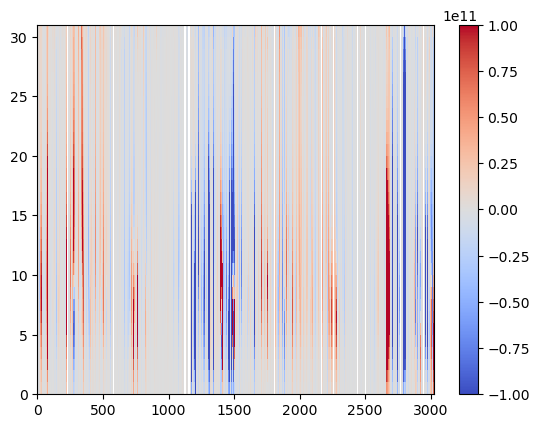

In [77]:
plt.pcolormesh(heat_transport_10kmCF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
plt.colorbar()

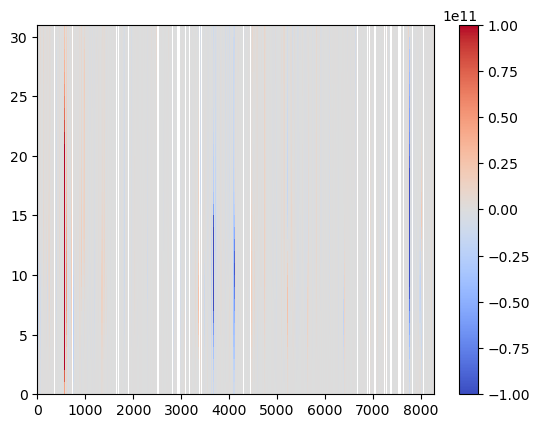

In [78]:
plt.pcolormesh(heat_transport_4kmCF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
plt.colorbar()

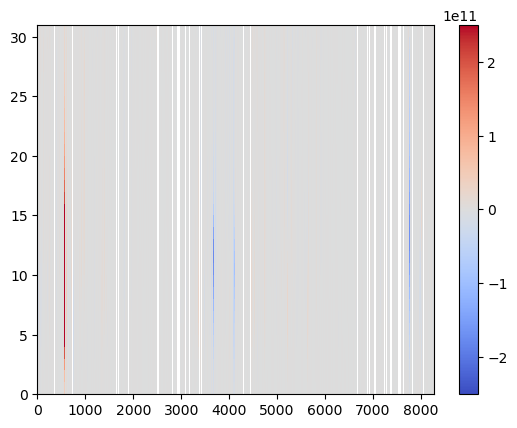

In [105]:
plt.pcolormesh(heat_transport_4kmNT_CF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
plt.colorbar()

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

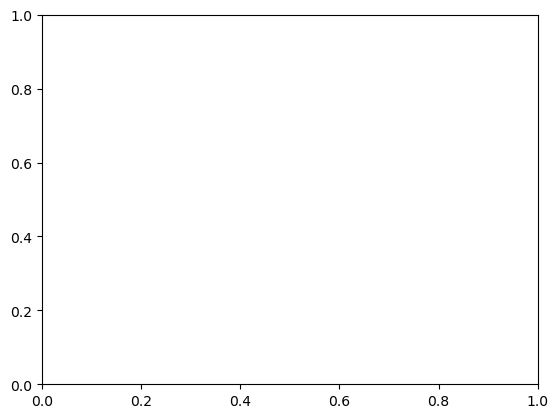

In [106]:
plt.pcolormesh(dist_along_4kmCF, z_rho_4kmNT_CF, heat_transport_4kmCF - heat_transport_4kmNT_CF)#, cmap='coolwarm', vmin=minHT*0.1, vmax=maxHT*0.1)
plt.colorbar()

In [100]:
print(dist_along_4kmCF.shape, z_rho_4kmNT_CF.shape, heat_transport_4kmCF.shape)
# plt.plot(dist_along_4kmCF)

(8282,) (31, 8282) (31, 8282)


In [140]:

# # define along_contour axis with same length for both resolution:
# # along_4km = np.arange(0,len(heat_transport_4km[0,:]),1)
# # along_10km = np.arange(0,len(heat_transport_4km[0,:]),2.6734930448222567)

# [dist_along_axis_10kmCF, Zaxis_10kmCF] = np.meshgrid(dist_along_10kmCF, np.arange(0,31))
# [dist_along_axis_4kmCF, Zaxis_4kmCF] = np.meshgrid(dist_along_4kmCF, np.arange(0,31))
# [dist_along_axis_4kmCF, Zaxis_4kmNT_CF] = np.meshgrid(dist_along_4kmCF, np.arange(0,31))

# # define min/max for pcolor:
# minHT = -.25e12
# maxHT = .25e12

# fig, ax = plt.subplots(nrows=4, figsize = (10, 15))
# # plotting absolute value: Tf heat transport already subtracted during the calculation
# ht = ax[0].pcolormesh(dist_along_axis_10kmCF, z_rho_10kmCF, heat_transport_10kmCF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
# ax[0].set_title('WAOM10')
# ht = ax[1].pcolormesh(dist_along_axis_4kmCF, z_rho_4kmCF, heat_transport_4kmCF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
# ax[1].set_title('WAOM4')
# ht = ax[2].pcolormesh(dist_along_axis_4kmCF, z_rho_4kmNT_CF, heat_transport_4kmNT_CF, cmap='coolwarm', vmin=minHT, vmax=maxHT)
# ax[2].set_title('WAOM4-NOTIDE')
# hta = ax[3].pcolormesh(dist_along_axis_4kmCF, z_rho_4kmNT_CF, heat_transport_4kmCF-heat_transport_4kmNT_CF, cmap='coolwarm', vmin=-.1e12, vmax=.1e12)
# ax[3].set_title('WAOM4 minus WAOM4-NOTIDE')

# # - setting all axis xticks the same with ax.flat:
# # for aa in ax.flat:
# #     aa.set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
# #     aa.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
# #                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# #     aa.set_xlim(0, dist_along_10km[-1])
# # - setting individual axis xticks:
# ax[0].set_xticks(dist_along_10kmCF[distance_indices_10kmCF.astype(int)[:]])
# ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                           '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
# ax[0].set_xlim(0, dist_along_10kmCF[-1])

# for aa in np.arange(1,4):
#     ax[aa].set_xticks(dist_along_4kmCF[distance_indices_4kmCF.astype(int)[:]])
#     ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[aa].set_xlim(0, dist_along_10kmCF[-1])

# ax[3].set_xlabel('Longitude coordinates along contour')

# cax1 = plt.axes([0.95, 0.31, 0.01, 0.55])
# cb = plt.colorbar(ht, cax=cax1, orientation='vertical')
# cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

# cax2 = plt.axes([0.95, 0.1, 0.01, 0.18])
# cb = plt.colorbar(hta, cax=cax2, orientation='vertical')
# cb.ax.set_ylabel('Heat transport anomaly (W)')

# name_fig='WAOM10x4x4NT_Cross-CalvingFront_transportXdepth.png'
# plt.savefig(fig_path + name_fig, dpi=300)


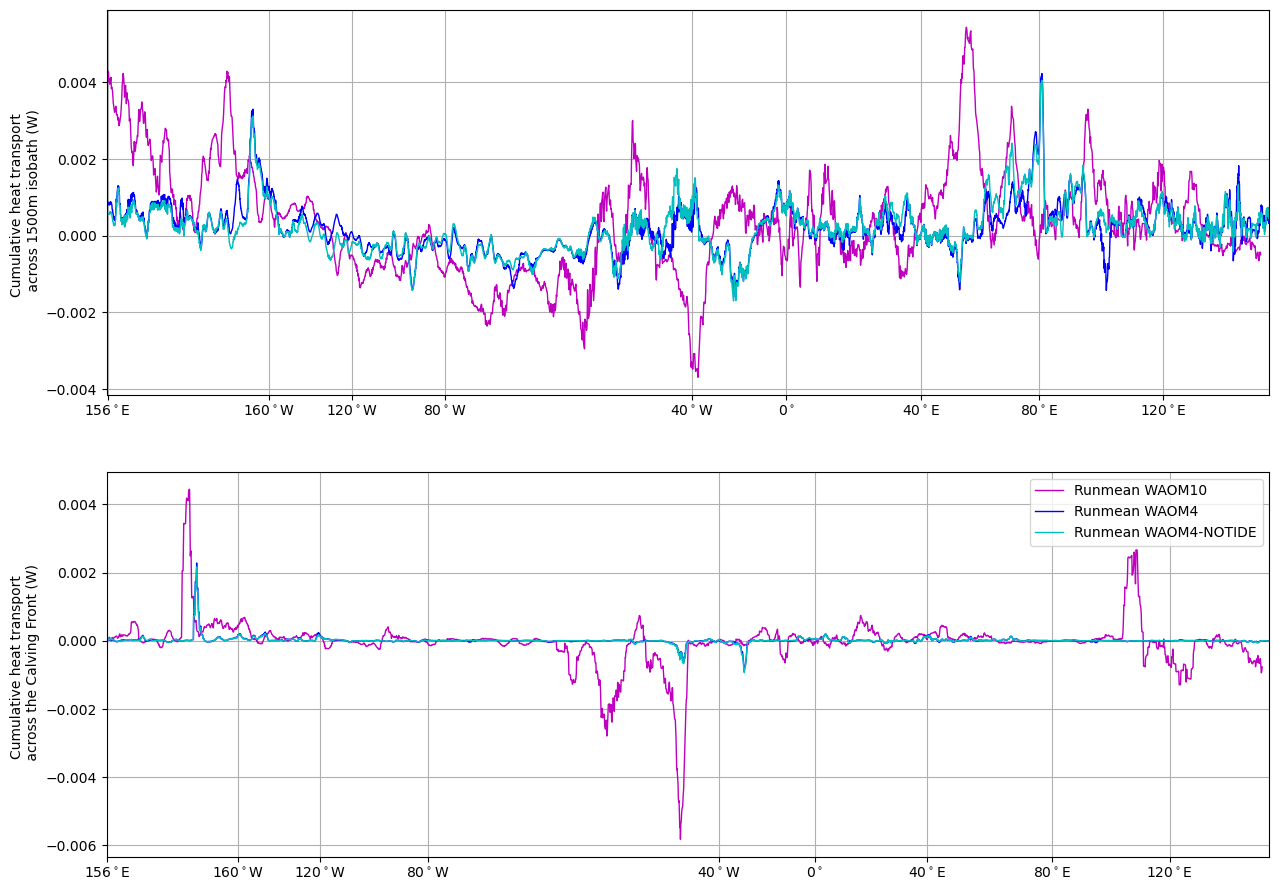

In [68]:

# some plots:
fig, ax = plt.subplots(nrows=2, figsize = (15, 11))
# plotting absolute value: Tf heat transport already subtracted during the calculation
# WAOM10
# ax[0].plot(dist_along_10km,(np.sum(heat_transport_10km, axis=0)), '--m', label='WAOM10',linewidth=0.2)
x=np.sum(heat_transport_10km, axis=0)
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_10km[np.arange(0,len(heat_transport_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-m', label='Runmean WAOM10',linewidth=1) 
# WAOM4
# ax[0].plot(dist_along_4km,(np.sum(heat_transport_4km, axis=0)), '--b', label='WAOM4',linewidth=0.2)
x=np.sum(heat_transport_4km, axis=0)
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_4km[np.arange(0,len(heat_transport_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-b', label='Runmean WAOM4',linewidth=1) 
# WAOM4-NOTIDE
# ax[0].plot(dist_along_4km,(np.sum(heat_transport_4kmNT, axis=0)), '--c', label='WAOM4-NOTIDE',linewidth=0.1)
x=np.sum(heat_transport_4kmNT, axis=0)
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_4km[np.arange(0,len(heat_transport_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-c', label='Runmean WAOM4-NOTIDE',linewidth=1) 

# - setting individual axis xticks:
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# WAOM10
# plotting absolute value: Tf heat transport already subtracted during the calculation
# ax[1].plot(dist_along_10kmCF,(np.sum(heat_transport_10kmCF, axis=0)), '-m', label='WAOM10',linewidth=0.2)
# x=np.sum(np.divide(heat_transport_10kmCF,10), axis=0)                                       ### DIVIDING WAOM10 BY 10!!!!!!!!!!!
x=np.sum(heat_transport_10kmCF, axis=0) 
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[1].plot(dist_along_10kmCF[np.arange(0,len(heat_transport_10kmCF[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-m', label='Runmean WAOM10',linewidth=1) 
# WAOM4
# ax[1].plot(dist_along_4kmCF,(np.sum(heat_transport_4kmCF, axis=0)), '-b', label='WAOM4',linewidth=0.2)
x=np.sum(heat_transport_4kmCF, axis=0)
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[1].plot(dist_along_4kmCF[np.arange(0,len(heat_transport_4kmCF[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-b', label='Runmean WAOM4',linewidth=1) 
# WAOM4-NOTIDE
# ax[1].plot(dist_along_4kmCF,(np.sum(heat_transport_4kmNT_CF, axis=0)), '-c', label='WAOM4-NOTIDE',linewidth=0.1)
x=np.sum(heat_transport_4kmNT_CF, axis=0)
N=20 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[1].plot(dist_along_4kmCF[np.arange(0,len(heat_transport_4kmNT_CF[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid')*1e-15, '-c', label='Runmean WAOM4-NOTIDE',linewidth=1) 

# - setting individual axis xticks:
ax[1].set_xticks(dist_along_10kmCF[distance_indices_10kmCF.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10kmCF[-1])

ax[0].set_ylabel('Cumulative heat transport \n across 1500m isobath (W)');
ax[1].set_ylabel('Cumulative heat transport \n across the Calving Front (W)');
ax[0].grid()
ax[1].grid()

ax[1].legend()
name_fig='WAOM10x4x4NT_Cross-1500m_CalvingFront_cumtransport_vint_raw_daily.png'
plt.savefig(fig_path + name_fig, dpi=300)
